In [5]:
# 说明： 图片npy批量=旋转90°

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import time
import os.path as osp


In [6]:
#===获得文件最大序号值===#
def Get_IMG_SeqNum(root = './', img_suffix = '.npy', img_name_start = 'color', img_name_startnum = 5): 
    # root = './'  #指定目录 
    Seq_num_Png = [] 
    for files in os.listdir(root): 
        if (os.path.splitext(files)[1]== img_suffix) & (os.path.splitext(files)[0][:img_name_startnum]==img_name_start):  
            Seq_num_Png.append(int(os.path.splitext(files)[0][-6:])) 
    if len(Seq_num_Png)==0:  #列表为空 返回0  
        Seq_num_Png.append(0) 
    return max(Seq_num_Png) 
# 实例 = 获取最大文件序号 
Get_IMG_SeqNum(root ="./Image_NPY/NPY_color_depth/")  

1522

In [9]:
# 批量转换主程序 = 图片npy旋转90°

Figure_NUM = Get_IMG_SeqNum(root ="./Image_NPY/NPY_color_depth/")  #获取处理图片数量

for Seq_num in range(Figure_NUM + 1):   # 单个文件[1522, 1511]

    # 文件目录=组成块
    Plantname = '_HLG' 
    str_Fig_CNT_Seq = Plantname + '_' + str(Seq_num).zfill(6)    # 含植物名称
    # 读取路径
    Image_path = ["./Image_NPY/NPY_color_depth/", "./Image_NPY/NPY_Infrared/", "./Image_NPY/NPY_depthFill/", 
                "./Image_IMG/IMG_color_depth/", "./Image_IMG/IMG_Infrared/", "./Image_IMG/IMG_depthFill/"]   
    # 保存路径
    Image_path2 = ["./Image_NPY2/NPY_color_depth/", "./Image_NPY2/NPY_Infrared/", 
                "./Image_IMG2/IMG_color_depth/", "./Image_IMG2/IMG_Infrared/"] 

    # 检测路径是否存在，不存在跳过for循坏
    color_image_pathis = os.path.isfile( path=  Image_path[0] +'color'+ str_Fig_CNT_Seq +'.npy' )
    deep_image_pathis = os.path.isfile( path=  Image_path[0] +'depth'+ str_Fig_CNT_Seq +'.npy' )
    ir_left_image_pathis = os.path.isfile(path = Image_path[1] +'ir_left'+ str_Fig_CNT_Seq +'.npy' )
    ir_right_image_pathis = os.path.isfile( path  = Image_path[1] +'ir_right'+ str_Fig_CNT_Seq +'.npy' )



    if color_image_pathis:
        color_image_npy = np.load(file = Image_path[0] +'color'+ str_Fig_CNT_Seq +'.npy') # 加载npy文件 
        color_image_npy90 = np.rot90(color_image_npy ,1,axes=(0,1))  # 图像反旋转90°   
        np.save(file = Image_path2[0] +'color'+ str_Fig_CNT_Seq +'.npy', arr = color_image_npy90) #保存图像npy数据
        cv2.imwrite( Image_path2[2] + 'color' + str_Fig_CNT_Seq +'.png', color_image_npy90) #保存图像数据


    if deep_image_pathis:
        deep_image_npy = np.load(file = Image_path[0] +'depth'+ str_Fig_CNT_Seq +'.npy')  # 加载npy文件
        deep_image_npy90 = np.rot90(deep_image_npy ,1,axes=(0,1))  # 图像反旋转90° 
        np.save(file = Image_path2[0] +'depth'+ str_Fig_CNT_Seq +'.npy', arr = deep_image_npy90) #保存图像npy数据
        deep_image_npy_cMAP90 = cv2.applyColorMap(cv2.convertScaleAbs(deep_image_npy90, alpha=0.03), cv2.COLORMAP_JET) #伪彩图

    if ir_left_image_pathis:
        ir_left_image = np.load(file = Image_path[1] +'ir_left'+ str_Fig_CNT_Seq +'.npy') # 加载npy文件
        ir_left_image90 =  np.rot90(ir_left_image ,1,axes=(0,1))   # 图像反旋转90°
        np.save(file = Image_path2[1] +'ir_left'+ str_Fig_CNT_Seq +'.npy', arr = ir_left_image90 ) #保存图像npy数据
        cv2.imwrite( Image_path2[3] + 'ir_left' + str_Fig_CNT_Seq + '.png', ir_left_image90) #保存图像数据

    if ir_right_image_pathis:
        ir_right_image = np.load(file = Image_path[1] +'ir_right'+ str_Fig_CNT_Seq +'.npy') # 加载npy文件
        ir_right_image90 = np.rot90(ir_right_image ,1,axes=(0,1))  # 图像反旋转90°
        np.save(file = Image_path2[1] +'ir_right'+ str_Fig_CNT_Seq +'.npy', arr = ir_right_image90) #保存图像npy数据
        cv2.imwrite( Image_path2[3] + 'ir_right' + str_Fig_CNT_Seq + '.png', ir_right_image90) #保存图像数据



    # deep_image_npy_cMAP90 = cv2.applyColorMap(cv2.convertScaleAbs(deep_image_npy90, alpha=0.03), cv2.COLORMAP_JET) 
    # images_H90 = np.hstack((color_image_npy90, deep_image_npy_cMAP90)) 
    # images_plt90 = cv2.cvtColor(images_H90, cv2.COLOR_BGR2RGB) 

    # plt.rcParams['figure.figsize'] = [16, 6] 
    # plt.imshow(images_plt90) 

(1280, 720, 3)
(1280, 720)
(1280, 720)
False


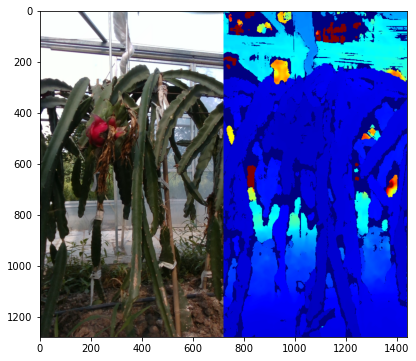

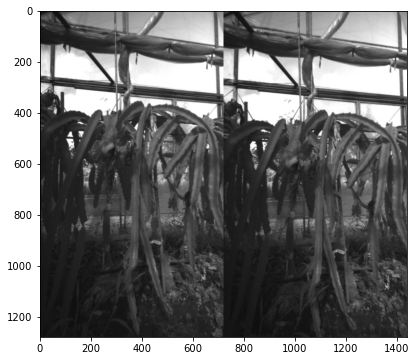

In [18]:
# 验证转换的npy正确性
# 文件目录=组成块
Seq_num = 3
Plantname = '_HLG' 
str_Fig_CNT_Seq = Plantname + '_' + str(Seq_num).zfill(6)    # 含植物名称
Image_path2 = ["./Image_NPY2/NPY_color_depth/", "./Image_NPY2/NPY_Infrared/", 
                "./Image_IMG2/IMG_color_depth/", "./Image_IMG2/IMG_Infrared/"] 

color_image_npy1 = np.load(file = Image_path2[0] +'color'+ str_Fig_CNT_Seq +'.npy')  # 加载npy文件 
deep_image_npy1 = np.load(file = Image_path2[0] +'depth'+ str_Fig_CNT_Seq +'.npy')    # 加载npy文件
ir_left_image1 = np.load(file = Image_path2[1] +'ir_left'+ str_Fig_CNT_Seq +'.npy')   # 加载npy文件
ir_right_image1 = np.load(file = Image_path2[1] +'ir_right'+ str_Fig_CNT_Seq +'.npy') # 加载npy文件
deep_image_npy_cMAP1 = cv2.applyColorMap(cv2.convertScaleAbs(deep_image_npy1, alpha=0.03), cv2.COLORMAP_JET) #伪彩图

plt.figure(1)
images_H1 = np.hstack((color_image_npy1, deep_image_npy_cMAP1))
images_H1= cv2.cvtColor(images_H1, cv2.COLOR_BGR2RGB)  
plt.rcParams['figure.figsize'] = [16, 6] 
plt.imshow(images_H1)
   
plt.figure(2)
images_H1 = np.hstack((ir_left_image1,ir_right_image1 ))
images_H1= cv2.cvtColor(images_H1, cv2.COLOR_BGR2RGB)  
plt.rcParams['figure.figsize'] = [16, 6] 
plt.imshow(images_H1) 

print(color_image_npy1.shape)
print(ir_right_image1.shape)
print(ir_left_image1.shape)
print((ir_right_image1 == ir_left_image1).all())

In [1]:
#===创建的目录= 函数===#
def mkdir(path):
    import os      # 引入模块
    isExists=os.path.exists(path) # 判断路径是否存在 #存在True  #不存在 False
    if not isExists: # 判断结果
        os.makedirs(path) # 创建目录操作函数
        print (path +' 创建成功')
        return True
    else:  
        print (path+' 目录已存在')# 如果目录存在则不创建，并提示目录已存在
        return False

if False:        
    # 定义要创建的目录
    Image_path = ["./Image_NPY/NPY_color_depth/", "./Image_NPY/NPY_Infrared/", "./Image_NPY/NPY_depthFill/", 
                "./Image_IMG/IMG_color_depth/", "./Image_IMG/IMG_Infrared/", "./Image_IMG/IMG_depthFill/"]   
    # 调用函数
    for path in Image_path:
        mkdir(path)

# 定义要创建的目录2
Image_path2 = ["./Image_NPY2/NPY_color_depth/", "./Image_NPY2/NPY_Infrared/", 
            "./Image_IMG2/IMG_color_depth/", "./Image_IMG2/IMG_Infrared/"]   
# 调用函数2
for path in Image_path2:
    mkdir(path)

./Image_NPY2/NPY_color_depth/ 创建成功
./Image_NPY2/NPY_Infrared/ 创建成功
./Image_IMG2/IMG_color_depth/ 创建成功
./Image_IMG2/IMG_Infrared/ 创建成功
